In [1]:
# Install necessary libraries
!pip install qwen-vl-utils optimum auto-gptq transformers PyPDF2 python-pptx tiktoken pdf2image pillow

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.7/453.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.

In [2]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optimum 1.22.0 requires transformers[sentencepiece]<4.45.0,>=4.29, but you have transformers 4.45.1 which is incompatible.


In [3]:
import os
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoProcessor, AutoModelForVision2Seq
from pprint import pprint
from pdf2image import convert_from_path
from PIL import Image
import io
from io import BytesIO
import base64
from qwen_vl_utils import process_vision_info

In [4]:
# Use Qwen VL-7B-Instruct model
model_name = "Qwen/Qwen2-VL-7B-Instruct"
model = AutoModelForVision2Seq.from_pretrained(model_name, torch_dtype="auto", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_name)
processor = AutoProcessor.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [5]:
def generate(images, prompt, **gen_kwargs):
    # Assuming 'images' is a list of multiple image tensors
    inputs = processor(text=prompt, images=images, return_tensors="pt").to("cuda")  # Update to use 'images'

    gen_kwargs['max_new_tokens'] = gen_kwargs.get("max_new_tokens", 1000)
    gen_kwargs['temperature'] = gen_kwargs.get("temperature", 0.01)

    with torch.no_grad():
        output = model.generate(**inputs, **gen_kwargs)

    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

In [6]:
# Convert PPT to PDF and extract images
from google.colab import files
uploaded = files.upload()  # Upload your 'InSightPro.pptx' file



Saving InSightPro (3).pptx to InSightPro (3).pptx


In [7]:
# Install LibreOffice
!apt-get install -y libreoffice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor default-jre default-jre-headless dictionaries-common firebird3.0-common
  firebird3.0-common-doc firebird3.0-server-core firebird3.0-utils fonts-crosextra-caladea
  fonts-crosextra-carlito fonts-dejavu fonts-dejavu-core fonts-dejavu-extra fonts-liberation2
  fonts-linuxlibertine fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-opensymbol fonts-sil-gentium fonts-sil-gentium-basic gstreamer1.0-gl gstreamer1.0-gtk3
  hunspell-en-us libabsl20210324 libabw-0.1-1 libatk-wrapper-java libatk-wrapper-java-jni
  libbsh-java libcdr-0.1-1 libclucene-contribs1v5 libclucene-core1v5 libcolamd2 libe-book-0.1-1
  libel-api-java libeot0 libepubgen-0.1-1 libetonyek-0.1-1 libexttextcat-2.0-0 libexttextcat-data
  libfbclient2 libfontenc1 libfreehand-0.1-1 libgpgme11 libgpgmepp6 libgraphene-1.0-0
  libgstreamer-gl1.0-0 lib

In [8]:
# Check if the file is present in /content
!ls /content/

'InSightPro (3).pptx'   sample_data


In [9]:
!libreoffice --headless --convert-to pdf "InSightPro (3).pptx"

convert /content/InSightPro (3).pptx -> /content/InSightPro (3).pdf using filter : impress_pdf_Export


In [10]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (119 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 131929 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [11]:
from pdf2image import convert_from_path
from PIL import Image

def get_slide_images(pdf_path, start_slide, end_slide):
    # Convert the specified range of pages (slides) to images
    images = convert_from_path(pdf_path, first_page=start_slide, last_page=end_slide)
    return images  # Return the list of images for the specified slide range

def resize_image(image, max_size=(512, 512)):  # Reduce image size further
    return image.resize(max_size)

# Ask user for the range of slides to analyze
start_slide = int(input("Enter the starting slide number: "))
end_slide = int(input("Enter the ending slide number: "))

# Get the images of the selected range of slides
slide_images = get_slide_images("InSightPro (3).pdf", start_slide, end_slide)

# Resize each slide image before processing
resized_slide_images = [resize_image(image) for image in slide_images]

# The 'resized_slide_images' will now contain all the images in the specified range

Enter the starting slide number: 1
Enter the ending slide number: 6


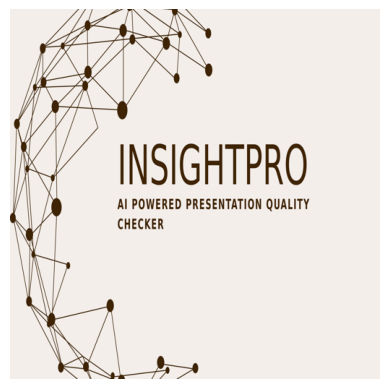

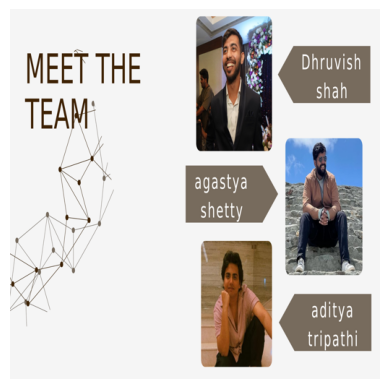

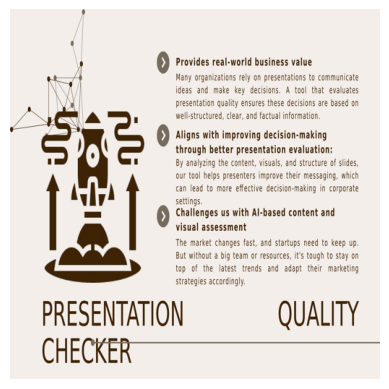

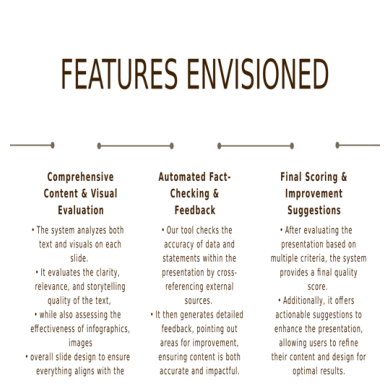

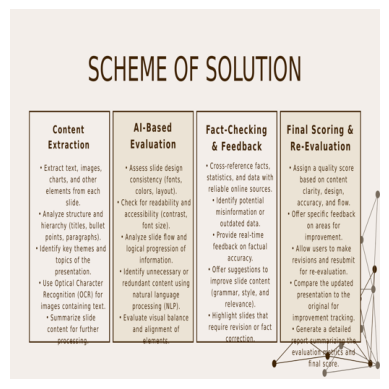

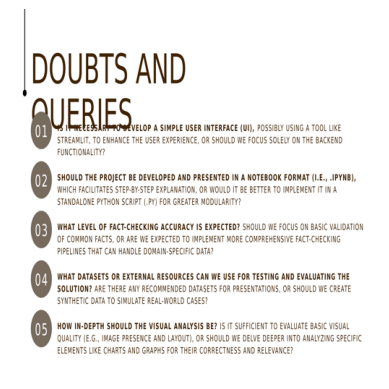

In [12]:
import matplotlib.pyplot as plt
# Display the image
for i in range(len(resized_slide_images)):
  plt.imshow(resized_slide_images[i])
  plt.axis('off')  # Turn off axis labels
  plt.show()

In [13]:
def analyze_structure_hierarchy(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Analyze the structure hierarchy as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Structure Hierarchy": {{
            "key_points": [
                {{
                    "Main Title (if any)": "provide its content and hierarchical level. Be as detailed and accurate as possible.",
                    "Subtitles or Section Headers": "provide its content and hierarchical level. Be as detailed and accurate as possible.",
                    "Bullet Points (including sub-levels)": "provide its content and hierarchical level. Be as detailed and accurate as possible.",
                    "Paragraphs or Body Text": "provide its content and hierarchical level. Be as detailed and accurate as possible.",
                    "Any other textual elements": "provide its content and hierarchical level. Be as detailed and accurate as possible.",
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [14]:
analyze_structure_hierarchy(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Analyze the structure hierarchy as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Structure Hierarchy": {{\n            "key_points": [\n                {{\n                    "Main Title (if any)": "provide its content and hierarchical level. Be as detailed and accurate as possible.",\n                    "Subtitles or Section Headers": "provide its content and hierarchical level. Be as detailed and accurate as possible.",\n                    "Bullet Points (including sub-levels)": "provide its content and hierarchical level. Be as detailed and accurate as possible.",\n                    "Paragraphs or Body Text": "provide its content and hierarchical level. Be as detailed and accurate as possible.",\n                    "Any other textual elements": "provide its content and hierarchical level. Be as detailed and accura

In [15]:
def detect_key_themes(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Identify key themes and topics as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Key Themes": {{
            "key_points": [
                {{
                    "Main theme or topic": "1-2 sentences",
                    "Supporting themes or subtopics": "list up to 5",
                    "Any recurring keywords or phrases": "Be specific and concise in your analysis",
                    "The overall message or takeaway of the slide": "Be specific and concise in your analysis",
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
detect_key_themes(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Identify key themes and topics as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Key Themes": {{\n            "key_points": [\n                {{\n                    "Main theme or topic": "1-2 sentences",\n                    "Supporting themes or subtopics": "list up to 5",\n                    "Any recurring keywords or phrases": "Be specific and concise in your analysis",\n                    "The overall message or takeaway of the slide": "Be specific and concise in your analysis",\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n  "Key Themes": {\n    "key_points": [\n      {\n        "Main theme or topic": "Presentation Quality",\n        "Supporting themes or subtopics": [\n          "R

In [16]:
def assess_slide_design_consistencies(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Analyze the design and content as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Design Assessment": {{
            "key_points": [
                {{
                    "Color scheme": "Evaluate the consistency of colors used across all slides",
                    "Font usage": "Evaluate the consistency of fonts used across all slides",
                    "Layout structure": "Evaluate the overall layout consistency with good design principles",
                    "Use of whitespace": "Assess how whitespace is used across all slides",
                    "Alignment of elements": "Evaluate the alignment of elements across all slides",
                    "Visual hierarchy": "Assess the effectiveness of visual hierarchy across all slides"
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
assess_slide_design_consistencies(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Analyze the design and content as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Design Assessment": {{\n            "key_points": [\n                {{\n                    "Color scheme": "Evaluate the consistency of colors used across all slides",\n                    "Font usage": "Evaluate the consistency of fonts used across all slides",\n                    "Layout structure": "Evaluate the overall layout consistency with good design principles",\n                    "Use of whitespace": "Assess how whitespace is used across all slides",\n                    "Alignment of elements": "Evaluate the alignment of elements across all slides",\n                    "Visual hierarchy": "Assess the effectiveness of visual hierarchy across all slides"\n                }}\n            ],\n            "summary": "Summarize the o

In [17]:
def check_readability(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Analyse the readability of the text as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Readabilty": {{
            "key_points": [
                {{
                    "Font size": "1-2 sentences",
                    "Text contrast against the background,
                    "Amount of text": "is it overwhelming?",
                    "Clarity": "Use of bullet points or numbering for clarity",
                    "Complexity": "Sentence structure and complexity"
                    "Readability Score": "Provide a readability score from 1-10 and explain your rating. Offer specific suggestions for improvement if needed."
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
check_readability(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Analyse the readability of the text as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Readabilty": {{\n            "key_points": [\n                {{\n                    "Font size": "1-2 sentences",\n                    "Text contrast against the background,\n                    "Amount of text": "is it overwhelming?",\n                    "Clarity": "Use of bullet points or numbering for clarity",\n                    "Complexity": "Sentence structure and complexity"\n                    "Readability Score": "Provide a readability score from 1-10 and explain your rating. Offer specific suggestions for improvement if needed."\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n    "Readability":

In [18]:
def detect_redundancy(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the content from multiple slides. Identify any redundant or repetitive content based on
      1. Repeated phrases or ideas
      2. Unnecessary elaboration
      3. Information that could be condensed
    as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Detect Redundancies": {{
            "key_points": [
                {{
                    Present or Not : "If redundancies are not found, Say Absent. If no redundancies are present, confirm this."
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
detect_redundancy(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the content from multiple slides. Identify any redundant or repetitive content based on  \n      1. Repeated phrases or ideas\n      2. Unnecessary elaboration\n      3. Information that could be condensed\n    as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Detect Redundancies": {{\n            "key_points": [\n                {{\n                    Present or Not : "If redundancies are not found, Say Absent. If no redundancies are present, confirm this."\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n  "Detect Redundancies": {\n    "key_points": [\n      {\n        "Present or Not": "No redundancies are found in the provided content."\n      }\n    ],\n    "summary": "The content from the multiple slides does not contain any redunda

In [19]:
def evaluate_alignments(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Evaluate the alignment of elements on this slide. Assess -
    1. Text alignment (left, right, center, justified)
    2. Alignment of visual elements (images, shapes, etc.)
    3. Consistency of alignment across different elements
    4. Use of guides or grids
    on slides as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Evaluate Alignments": {{
            "key_points": [
                {{
                    "Text Alignment":"Be specific",
                    "Alignment of visual elements":"Be specific",
                    "Consistency of alignment across different elements": "Be specific",
                    "Use of guides or grids":"Be specific"
                }}
            ],
            "summary": "Rate the overall alignment from 1-10 and provide specific examples of good alignment or areas needing improvement.Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
evaluate_alignments(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Evaluate the alignment of elements on this slide. Assess - \n    1. Text alignment (left, right, center, justified)\n    2. Alignment of visual elements (images, shapes, etc.)\n    3. Consistency of alignment across different elements\n    4. Use of guides or grids \n    on slides as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Evaluate Alignments": {{\n            "key_points": [\n                {{\n                    "Text Alignment":"Be specific",\n                    "Alignment of visual elements":"Be specific",\n                    "Consistency of alignment across different elements": "Be specific",\n                    "Use of guides or grids":"Be specific"\n                }}\n            ],\n            "summary": "Rate the overall alignment from 1-10 and provide specific examples of good alignment or areas need

In [20]:
def offer_suggestions(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Offer detailed suggestions  to improve the slides. Consider -
    1. Content clarity and conciseness
    2. Visual appeal and engagement
    3. Use of visual aids (charts, images, icons)
    4. Layout and organization
    5. Adherence to presentation best practices
    on slides as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Offer Suggestion": {{
            "key_points": [
                {{
                    "Which slide needs improvement": "Provide the slide number and a yes/no decision on whether the slides needs improvement. If yes, explain why and list the top 3 areas that need attention."
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
offer_suggestions(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Offer detailed suggestions  to improve the slides. Consider - \n    1. Content clarity and conciseness\n    2. Visual appeal and engagement\n    3. Use of visual aids (charts, images, icons)\n    4. Layout and organization\n    5. Adherence to presentation best practices \n    on slides as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Offer Suggestion": {{\n            "key_points": [\n                {{\n                    "Which slide needs improvement": "Provide the slide number and a yes/no decision on whether the slides needs improvement. If yes, explain why and list the top 3 areas that need attention."\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n  "Offer Suggestion": {\n    "key_po

In [21]:
def highlight_slides_for_revision(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Determine if any slide needs revision. Consider -
    1. Clarity of message
    2. Visual appeal
    3. Information overload
    4. Adherence to design principles
    5. Potential for audience engagement
    on slides as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Highlight Slides for Revision": {{
            "key_points": [
                {{
                    Slides for Revision":"Provide the slide number and a yes/no decision on whether the slides needs revision. If yes, explain why and list the top 3 areas that need attention."
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
highlight_slides_for_revision(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Determine if any slide needs revision. Consider - \n    1. Clarity of message\n    2. Visual appeal\n    3. Information overload\n    4. Adherence to design principles\n    5. Potential for audience engagement\n    on slides as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Highlight Slides for Revision": {{\n            "key_points": [\n                {{\n                    Slides for Revision":"Provide a yes/no decision on whether the slides needs revision. If yes, explain why and list the top 3 areas that need attention."\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n  "Highlight Slides for Revision": {\n    "key_points": [\n      {\n        "Slides for Revision": "Yes",\n        "Areas 

In [22]:
def assign_quality_score(resized_slide_images):
    # Unified prompt to assess both the design and content of the entire set of slides
    prompt = """You will be given the design and content from multiple slides. Assign a quality score to this slide based on its overall effectiveness. Consider -
    1. Content quality and relevance
    2. Visual design
    3. Readability and clarity
    4. Adherence to presentation best practices
    5. Potential impact on the audience
    on all the slides as a whole and provide a detailed response using the following structure:

    ```json
    {{
        "Quality Score": {{
            "key_points": [
                {{
                    "Score": "Assign a score from 1-10"
                }},
                {{
                    "Score Jsutification": " a detailed justification for your score. Break down the score into subcategories if possible.Also, give the reasons of not getting a perfect score."
                }}
            ],
            "summary": "Summarize the overall response and give a brief summary."
        }}
    }}
    ```

    """
    # Collect base64 encoded images of all slides
    combined_base64_images = []
    for image in resized_slide_images:
        buffer = io.BytesIO()
        image.save(buffer, format='PNG')
        base64_image = base64.b64encode(buffer.getvalue()).decode("utf-8")
        combined_base64_images.append(f"data:image/png;base64,{base64_image}")

    # Create a message with the prompt and all slides combined
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": img_base64
                } for img_base64 in combined_base64_images
            ] + [
                {"type": "text", "text": prompt}
            ],
        }
    ]

    # Prepare for inference
    text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)

    # Call the generate function to get a single unified response
    return generate(image_inputs, text)

In [ ]:
assign_quality_score(resized_slide_images)

'system\nYou are a helpful assistant.\nuser\nYou will be given the design and content from multiple slides. Assign a quality score to this slide based on its overall effectiveness. Consider - \n    1. Content quality and relevance\n    2. Visual design\n    3. Readability and clarity\n    4. Adherence to presentation best practices\n    5. Potential impact on the audience\n    on all the slides as a whole and provide a detailed response using the following structure:\n\n    ```json\n    {{\n        "Quality Score": {{\n            "key_points": [\n                {{\n                    "Score": "Assign a score from 1-100"\n                }},\n                {{\n                    "Score Jsutification": " a detailed justification for your score. Break down the score into subcategories if possible."\n                }}\n            ],\n            "summary": "Summarize the overall response and give a brief summary."\n        }}\n    }}\n    ```\n\n    \nassistant\n```json\n{\n  "Qual

In [23]:
# Generate a detailed report for the selected slide
def generate_detailed_report(image):
    report = {
        "Structure Hierarchy": analyze_structure_hierarchy(image),
        "Key Themes": detect_key_themes(image),
        "Slide Design Consistencies": assess_slide_design_consistencies(image),
        "Readability": check_readability(image),
        "Redundancy Detection": detect_redundancy(image),
        "Alignments Evaluation": evaluate_alignments(image),
        "Suggestions": offer_suggestions(image),
        "Needs Revision": highlight_slides_for_revision(image),
        "Quality Score": assign_quality_score(image)
    }
    return report

In [25]:
# Generate and print the report
report = generate_detailed_report(resized_slide_images)
pprint(report)

{'Alignments Evaluation': 'system\n'
                          'You are a helpful assistant.\n'
                          'user\n'
                          'You will be given the design and content from '
                          'multiple slides. Evaluate the alignment of elements '
                          'on this slide. Assess -\n'
                          '    1. Text alignment (left, right, center, '
                          'justified)\n'
                          '    2. Alignment of visual elements (images, '
                          'shapes, etc.)\n'
                          '    3. Consistency of alignment across different '
                          'elements\n'
                          '    4. Use of guides or grids\n'
                          '    on slides as a whole and provide a detailed '
                          'response using the following structure:\n'
                          '\n'
                          '    ```json\n'
                          '   